In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from joblib import parallel_backend
#with parallel_backend('threading', n_jobs=-1):

warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('titanic/train.csv')
test=pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.loc[:30,['Cabin','Fare']]

,Cabin,Fare
0,NaN,7.2500
1,C85,71.2833
2,NaN,7.9250
3,C123,53.1000
4,NaN,8.0500
5,NaN,8.4583
6,E46,51.8625
7,NaN,21.0750
8,NaN,11.1333
9,NaN,30.0708


In [9]:
train.loc[:30,['Name','Survived']]

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
5,"Moran, Mr. James",0
6,"McCarthy, Mr. Timothy J",0
7,"Palsson, Master. Gosta Leonard",0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,"Nasser, Mrs. Nicholas (Adele Achem)",1


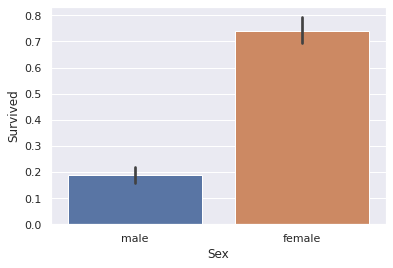

In [10]:
sns.set()

sns.barplot(data=train,x='Sex',y='Survived')
plt.show()

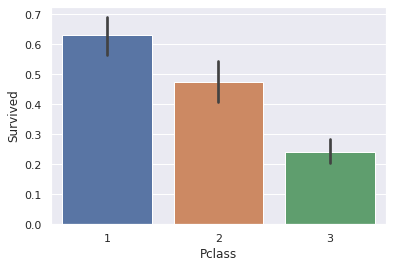

In [11]:
sns.barplot(data=train,x='Pclass',y='Survived')
plt.show()

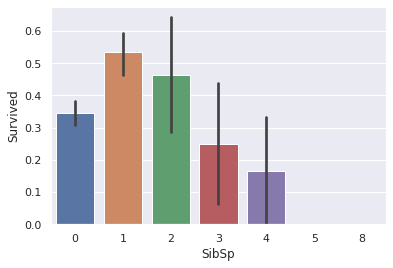

In [12]:
sns.barplot(data=train,x='SibSp',y='Survived')
plt.show()

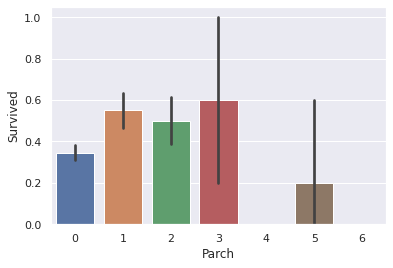

In [13]:
sns.barplot(data=train,x='Parch',y='Survived')
plt.show()

In [14]:
age=range(0,80,10)
labels=range(1,8)
train['Age_c']=pd.cut(x=train.Age,bins=age,labels=labels)
test['Age_c']=pd.cut(x=test.Age,bins=age,labels=labels)

<Axes: xlabel='Age_c', ylabel='count'>

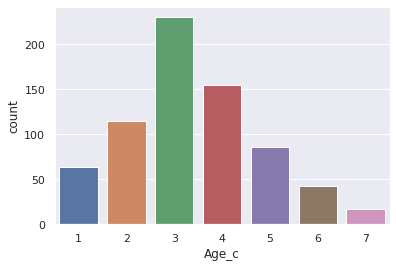

In [15]:
sns.countplot(data=train,x="Age_c",)

In [16]:
train=train.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

In [17]:
train=train.drop('Ticket',axis=1)
test=test.drop('Ticket',axis=1)

<Axes: xlabel='Embarked', ylabel='Survived'>

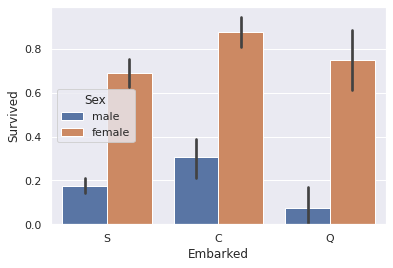

In [18]:
sns.barplot(data=train,x='Embarked',y="Survived",hue='Sex')

In [19]:
train=train.fillna({'Embarked':'S'})

In [20]:
train.Name.str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [21]:
train['Title']=train.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
test['Title']=test.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [22]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_c,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4,Mr


In [24]:
for data in [train,test]:
    data['Title']=data['Title'].replace('Mlle','Miss')
    data['Title']=data['Title'].replace('Ms','Miss')
    data['Title']=data['Title'].replace('Mme','Mrs')
    data['Title']=data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    data['Title']=data['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    

In [25]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [26]:
title_map={
    'Mr':1,
    'Rare':2,
    'Master':3,
    'Miss':4,
    'Mrs':5,
    'Royal':6
}

for data in [train,test]:
    data['Title']=data['Title'].map(title_map)

In [27]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [28]:
for data in [train,test]:
    sex_map={'male':0,
             'female':1}
    data['Sex']=data['Sex'].map(sex_map)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_c,Title
0,1,0,3,0,22.0,1,0,7.2500,S,3,1
1,2,1,1,1,38.0,1,0,71.2833,C,4,5
2,3,1,3,1,26.0,0,0,7.9250,S,3,4
3,4,1,1,1,35.0,1,0,53.1000,S,4,5
4,5,0,3,0,35.0,0,0,8.0500,S,4,1


In [30]:
mr_age=train[train['Title']==1]['Age_c'].mode().values[0]
rare_age=train[train['Title']==2]['Age_c'].mode().values[0]
master_age=train[train['Title']==3]['Age_c'].mode().values[0]
miss_age=train[train['Title']==4]['Age_c'].mode().values[0]
mrs_age=train[train['Title']==5]['Age_c'].mode().values[0]
royal_age=train[train['Title']==6]['Age_c'].mode().values[0]

In [31]:
age_title_mapping={
    1:mr_age,
    2:rare_age,
    3:master_age,
    4:miss_age,
    5:mrs_age,
    6:royal_age
}

In [32]:
indices_tra=train[train['Age_c'].isnull()].index
indices_tes=test[test['Age_c'].isnull()].index

In [33]:
for i in indices_tra:
    train.loc[i,'Age_c']=age_title_mapping[train.loc[i,'Title']]
    
for i in indices_tes:
    test.loc[i,'Age_c']=age_title_mapping[test.loc[i,'Title']]

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Age_c        891 non-null    category
 10  Title        891 non-null    int64   
dtypes: category(1), float64(2), int64(7), object(1)
memory usage: 70.7+ KB


In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_c,Title
0,1,0,3,0,22.0,1,0,7.2500,S,3,1
1,2,1,1,1,38.0,1,0,71.2833,C,4,5
2,3,1,3,1,26.0,0,0,7.9250,S,3,4
3,4,1,1,1,35.0,1,0,53.1000,S,4,5
4,5,0,3,0,35.0,0,0,8.0500,S,4,1


In [36]:
embarked_mapping={
    'S':1,
    'C':2,
    'Q':3
}

train["Embarked"]=train["Embarked"].map(embarked_mapping)
test["Embarked"]=test["Embarked"].map(embarked_mapping)

In [37]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.361392,2.317621
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.635673,1.638413
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,4.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,6.000000


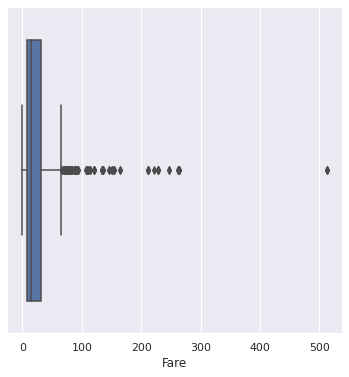

In [38]:
plt.figure(figsize=(6,6))
sns.boxplot(data=train,x='Fare')
plt.show()

In [39]:
train.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [40]:
fare=[-0.1,10,20,40,515]
labels=range(1,5)
train['Fare_c']=pd.cut(x=train.Fare,bins=fare,labels=labels)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_c,Title,Fare_c
0,1,0,3,0,22.0,1,0,7.2500,1,3,1,1
1,2,1,1,1,38.0,1,0,71.2833,2,4,5,4
2,3,1,3,1,26.0,0,0,7.9250,1,3,4,1
3,4,1,1,1,35.0,1,0,53.1000,1,4,5,4
4,5,0,3,0,35.0,0,0,8.0500,1,4,1,1


In [42]:
test['Fare']=test.Fare.fillna(test.Fare.mean())

fare=[-0.1,10,20,40,515]
labels=range(1,5)
test['Fare_c']=pd.cut(x=test.Fare,bins=fare,labels=labels)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    int64   
 9   Age_c        891 non-null    category
 10  Title        891 non-null    int64   
 11  Fare_c       891 non-null    category
dtypes: category(2), float64(2), int64(8)
memory usage: 71.7 KB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          332 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    float64 
 7   Embarked     418 non-null    int64   
 8   Age_c        418 non-null    category
 9   Title        418 non-null    int64   
 10  Fare_c       418 non-null    category
dtypes: category(2), float64(2), int64(7)
memory usage: 30.6 KB


In [45]:
train.drop(['PassengerId','Fare','Age'],axis=1,inplace=True)
pass_ind=test.PassengerId
test.drop(['PassengerId','Fare','Age'],axis=1,inplace=True)


In [46]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_c,Title,Fare_c
0,0,3,0,1,0,1,3,1,1
1,1,1,1,1,0,2,4,5,4
2,1,3,1,0,0,1,3,4,1
3,1,1,1,1,0,1,4,5,4
4,0,3,0,0,0,1,4,1,1


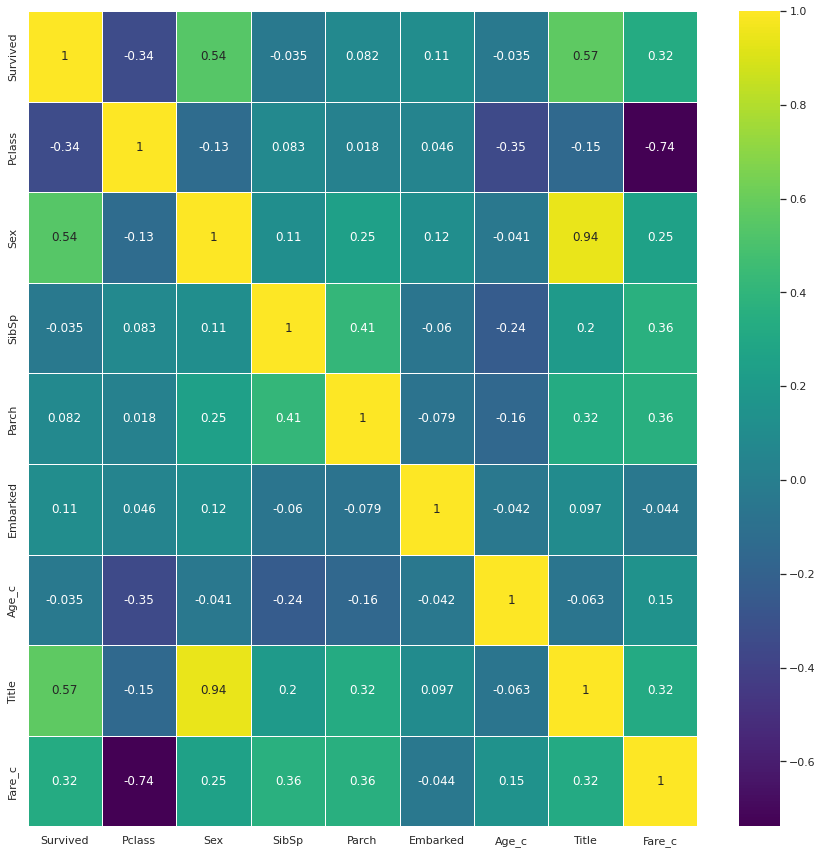

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,linewidth=0.5,cmap='viridis',)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [49]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train.Survived,test_size=0.2,random_state=42)

In [50]:
predicted={'Classifier':[],
          'Score':[]}

In [51]:
log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
log_ac=accuracy_score(log_pred,y_test)
predicted['Classifier'].append('LogistiRegression')
predicted['Score'].append(log_ac)
print(log_ac)

0.7932960893854749


In [52]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_params={'n_neighbors':range(1,10)}
clf_knn=GridSearchCV(estimator=knn,param_grid=knn_params,refit=True)
clf_knn.fit(x_train,y_train)

print(clf_knn.best_params_)

knn_pred=clf_knn.predict(x_test)
knn_ac=accuracy_score(knn_pred,y_test)
predicted['Classifier'].append('KNN')
predicted['Score'].append(knn_ac)


knn_best=clf_knn.best_estimator_
print(knn_ac)

{'n_neighbors': 7}
0.8212290502793296


In [53]:
svc=SVC(  probability=True)
svc_params={'gamma':[0.001,0.01,0.1,1,10],
       'C':[1,2,5,10,50,100,300,1000],
        'kernel':['rbf'],}
clf_svc=GridSearchCV(svc,svc_params)
with parallel_backend('threading', n_jobs=-1):
    clf_svc.fit(x_train,y_train)
print(clf_svc.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [54]:
svc_predict=clf_svc.predict(x_test)
svc_ac=accuracy_score(svc_predict,y_test)
print(svc_ac)

svc_best=clf_svc.best_estimator_

predicted['Classifier'].append('SVC')
predicted['Score'].append(svc_ac)

0.8156424581005587


In [55]:
rf=RandomForestClassifier(max_depth=9)
rf_param_grid = {"max_depth": range(1,15),
              "max_features": [1, 3,4,5,6, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

clf_rf= GridSearchCV(rf,param_grid = rf_param_grid, scoring="accuracy", n_jobs=-1, verbose = 1)


clf_rf.fit(x_train,y_train)
rf_predict=clf_rf.predict(x_test)
rf_ac=accuracy_score(rf_predict,y_test)
predicted['Classifier'].append('RandomForestClassifier')
predicted['Score'].append(rf_ac)

print(clf_rf.best_params_)
rf_best=clf_rf.best_estimator_
print(rf_ac)

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
0.8212290502793296


In [56]:
pd.DataFrame(predicted)

,Classifier,Score
0,LogistiRegression,0.793296
1,KNN,0.821229
2,SVC,0.815642
3,RandomForestClassifier,0.821229


In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
X_train=pd.concat([x_train,x_test],axis=0)
Y_train=pd.concat([y_train,y_test],axis=0)

In [59]:
voting_clf=VotingClassifier(estimators=[('log_1',log),('knn_1',knn_best),('svc_1',svc_best),
                                       ('rf_1',rf_best)],voting='soft')

voting_clf=voting_clf.fit(X_train,Y_train)


In [60]:
test_result=pd.DataFrame({'PassengerId':pass_ind,
                         'Survived':voting_clf.predict(test)})
test_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
test_result.to_csv("gender_submission.csv",index=False)